## Ejemplos de visualizaciones de árbol de decisión

In [15]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt

# Read in data and display first 5 rows
df = pd.read_csv('ejercicios/data/temps.csv')

# Actual column is the target
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [16]:
df.drop(columns = ['week'], inplace=True)
X = df.drop(columns = ['actual'])
y = df['actual']

In [17]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [18]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

DecisionTreeRegressor()

## Visualizaciones
### Matplotlib Viz

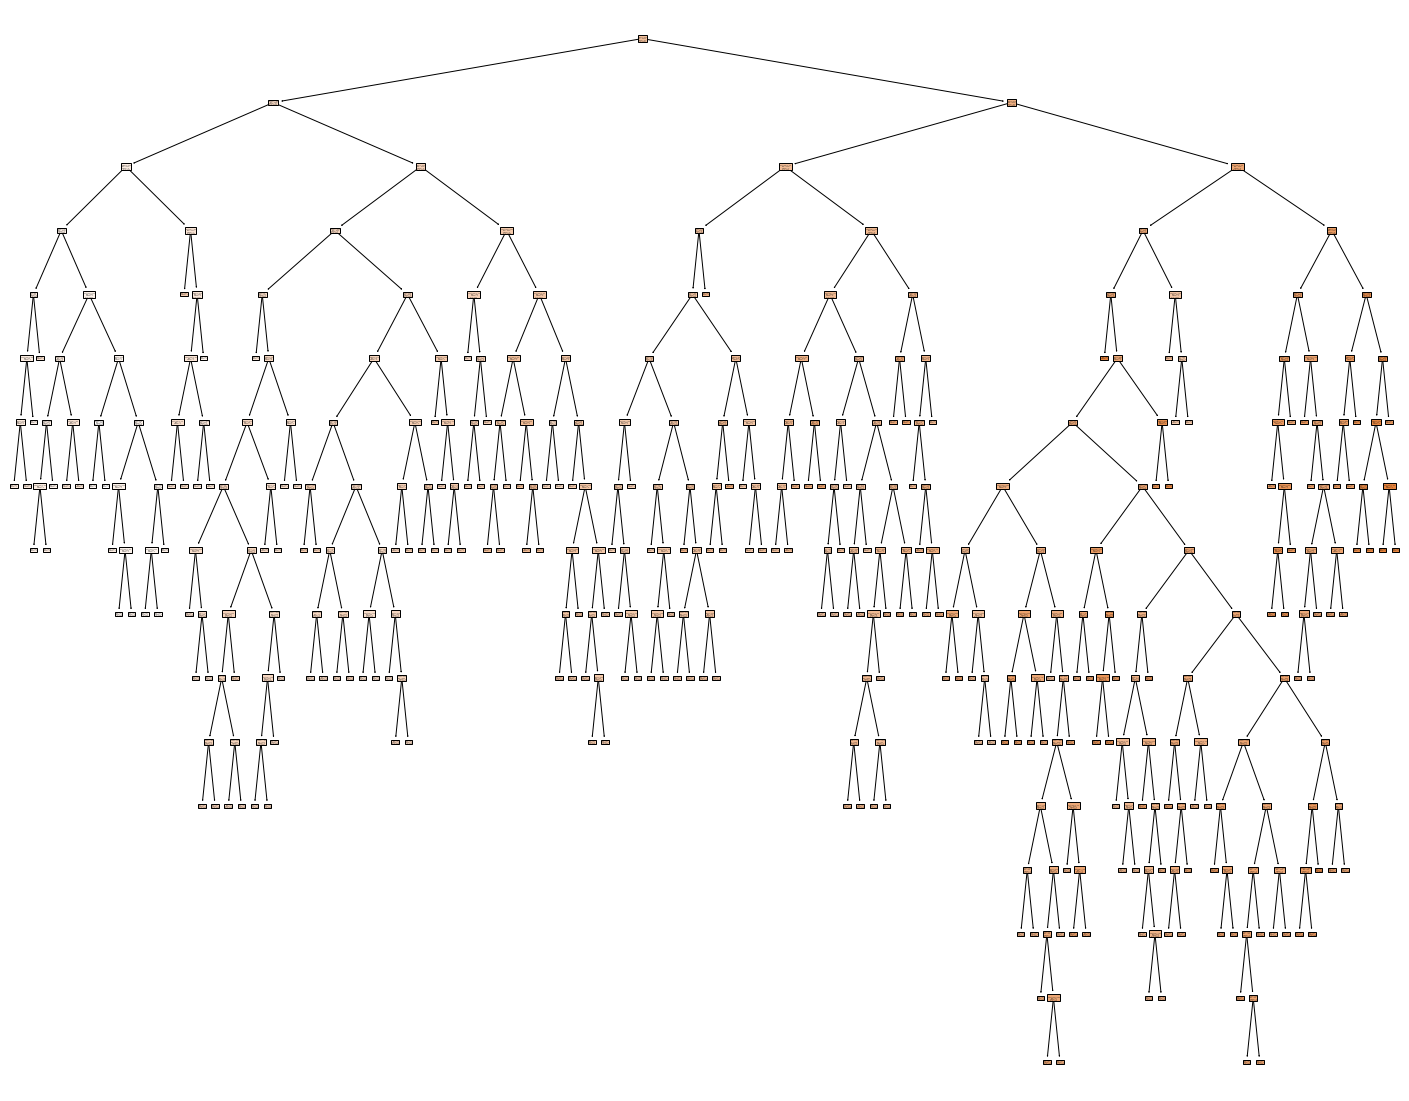

In [19]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=X.columns,  
                   class_names="actual",
                   filled=True)

In [20]:
fig.savefig("decistion_tree.png")

### GraphViz

In [21]:
#!pip install graphviz

'''
Despues instalar graphviz en el ordenador y ejecutar las siguientes lineas.
Donde
https://graphviz.org/download/
'''

'\nDespues instalar graphviz en el ordenador y ejecutar las siguientes lineas.\nDonde\nhttps://graphviz.org/download/\n'

In [22]:
import os

path_instalacion_graphviz = 'C:/Program Files/Graphviz/bin'

os.environ["PATH"] += os.pathsep + path_instalacion_graphviz

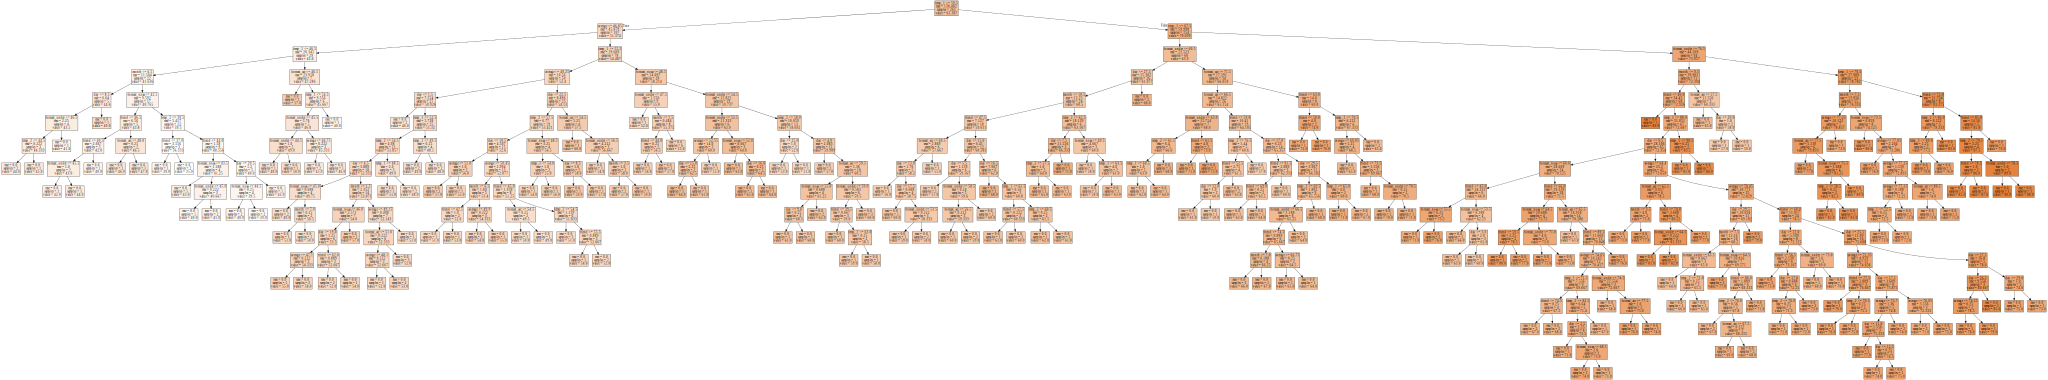

In [23]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtr, out_file=None, 
                                feature_names=X.columns,  
                                   class_names="actual",
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [24]:
# Para guardarlo
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

Para más opciones de visualización consultar:

https://mljar.com/blog/visualize-decision-tree/
